In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from grizli import utils, prep

from grizli.pipeline import auto_script
import grizli

utils.set_warnings()

print(grizli.__version__)

grp = None

1.6.0.dev61


sh: aws: command not found


In [2]:
# Working directory
HOME = '/Users/gbrammer/Research/JWST/Projects/FRESCO'

os.chdir(HOME)
for dir in ['Prep','Extractions']: # Grizli needs these
    if not os.path.exists(dir):
        os.mkdir(dir)

os.chdir('Prep')
os.getcwd()

'/Users/gbrammer/Research/JWST/Projects/FRESCO/Prep'

# Sync files from AWS

This requires you to have an AWS account, e.g., with credentials in `~/.aws/`, but transfering the files shouldn't incur any costs.

Also requires the `awscli` command line tools, e.g., `$ pip install awscli`.

In [3]:
if not os.path.exists('gds-grizli-v5.0-ir_seg.fits'):
    ! aws s3 sync s3://grizli-v2/JwstMosaics/v5/fresco/GrismExposures/ ./ --exclude "*" --include "*rate.fits"
    ! aws s3 sync s3://grizli-v2/JwstMosaics/v5/fresco/ ./ --exclude "*" --include "*-ir*" --include "*-f444w*" --include "*_phot.fits"

# Initialize the Grizli grism container object

In [5]:
from importlib import reload
from grizli import utils, model, multifit, grismconf
reload(auto_script); reload(model); reload(multifit); reload(grismconf)
reload(auto_script); reload(model); reload(multifit); reload(grismconf)

utils.set_warnings()

os.chdir(os.path.join(HOME, 'Prep'))

# Remove previous containers
if False: 
    ! rm *GrismFLT* ../Extractions/*

## Visit around the UDF
files = glob.glob('jw01895001003_0[24]*rate.fits')

## All exposures, requires quite a lot of memory
# files = glob.glob('jw01895*rate.fits')

## All NRCA
# files = glob.glob('jw01895*nrca*rate.fits')

# info = utils.get_flt_info(files=glob.glob("../Prep/*rate.fits"))
# files = info['FILE'][(info['DETECTOR'] == 'NRCALONG') & (info['PUPIL'] == 'GRISMR')].tolist()
# files.sort()

root = 'gds-grizli-v5.0'

# Segmentation image needs to be unzipped for now
if os.path.exists(f'{root}-ir_seg.fits.gz'):
    ! gunzip --force {root}-ir_seg.fits.gz

# Unzip mosaic to be faster
if os.path.exists(f'{root}-f444w-clear_drc_sci.fits.gz'):
    ! gunzip --force {root}-f444w-clear_drc_sci.fits.gz
    
grp = auto_script.grism_prep(field_root=root, PREP_PATH='../Prep', 
                             EXTRACT_PATH='../Extractions/', 
                             refine_niter=0, refine_mag_limits=[18, 24], 
                             prelim_mag_limit=24, 
                             init_coeffs=[1, -0.6],
                             pad=1200,
                             files=files,
                             subtract_median_filter=True, median_filter_size=71, 
                            )

# (2022-11-17 14:01:20.818)

auto_script.grism_prep(**{'field_root': 'gds-grizli-v5.0', 'PREP_PATH': '../Prep', 'EXTRACT_PATH': '../Extractions/', 'ds9': None, 'refine_niter': 0, 'gris_ref_filters': {'G141': ['F140W', 'F160W', 'F125W', 'F105W', 'F110W', 'F098M', 'F127M', 'F139M', 'F153M', 'F132N', 'F130N', 'F128N', 'F126N', 'F164N', 'F167N'], 'G102': ['F105W', 'F098M', 'F110W', 'F125W', 'F140W', 'F160W', 'F127M', 'F139M', 'F153M', 'F132N', 'F130N', 'F128N', 'F126N', 'F164N', 'F167N'], 'G800L': ['F814W', 'F850LP', 'F606W', 'F435W', 'F775W', 'F555W', 'opt'], 'GR150C': ['F115W', 'F150W', 'F200W', 'CLEAR-F115W', 'CLEAR-F150W', 'CLEAR-F200W'], 'GR150R': ['F115W', 'F150W', 'F200W', 'CLEAR-F115W', 'CLEAR-F150W', 'CLEAR-F200W'], 'GRISMR': ['F277W-CLEAR', 'F356W-CLEAR', 'F410M-CLEAR', 'F444W-CLEAR', 'F277W', 'F356W', 'F410M', 'F444W'], 'GRISMC': ['F277W-CLEAR', 'F356W-CLEAR', 'F410M-CLEAR', 'F444W-CLEAR', 'F277W', 'F356W', 'F410M', 'F444W']}, 'force_ref': None, 'files': ['jw01895001003_04101_00

In [6]:
# Previous script puts is in ../Extractions at the end
os.getcwd()

'/Users/gbrammer/Research/JWST/Projects/FRESCO/Extractions'

# Drizzle combined images by grism / PA

- `*grism_sci.fits` is the combination of the raw grism exposures
- `*grism_clean.fits` is the combination of the median-filtered images

PA=90.0 is NRCB, 270.0 is NRCA for the first FRESCO visits.

In [7]:
utils.set_warnings()

grp.drizzle_grism_models(root=root, kernel='square', scale=0.06, pixfrac=0.75)

gds-grizli-v5.0-f444w-90.0_grism_sci.fits
# (2022-11-17 14:04:19.181)
Drizzle array 1/8


2022-11-17 15:04:21,238 - stpipe - WARNING - ! 556 points were outside the output image.


# (2022-11-17 14:04:21.239)
Drizzle array 2/8
# (2022-11-17 14:04:23.265)
Drizzle array 3/8


2022-11-17 15:04:25,293 - stpipe - WARNING - ! 2963 points were outside the output image.
2022-11-17 15:04:27,328 - stpipe - WARNING - ! 1737 points were outside the output image.


# (2022-11-17 14:04:25.294)
Drizzle array 4/8


2022-11-17 15:04:29,360 - stpipe - WARNING - ! 1737 points were outside the output image.


# (2022-11-17 14:04:27.329)
Drizzle array 5/8
# (2022-11-17 14:04:29.361)
Drizzle array 6/8


2022-11-17 15:04:31,387 - stpipe - WARNING - ! 2968 points were outside the output image.
2022-11-17 15:04:33,414 - stpipe - WARNING - ! 557 points were outside the output image.


# (2022-11-17 14:04:31.388)
Drizzle array 7/8
# (2022-11-17 14:04:33.416)
Drizzle array 8/8
gds-grizli-v5.0-f444w-90.0_grism_clean.fits
# (2022-11-17 14:04:35.568)
Drizzle array 1/8


2022-11-17 15:04:37,628 - stpipe - WARNING - ! 556 points were outside the output image.


# (2022-11-17 14:04:37.630)
Drizzle array 2/8
# (2022-11-17 14:04:39.653)
Drizzle array 3/8


2022-11-17 15:04:41,677 - stpipe - WARNING - ! 2963 points were outside the output image.


# (2022-11-17 14:04:41.678)
Drizzle array 4/8


2022-11-17 15:04:43,704 - stpipe - WARNING - ! 1737 points were outside the output image.
2022-11-17 15:04:45,731 - stpipe - WARNING - ! 1737 points were outside the output image.


# (2022-11-17 14:04:43.705)
Drizzle array 5/8
# (2022-11-17 14:04:45.732)
Drizzle array 6/8


2022-11-17 15:04:47,755 - stpipe - WARNING - ! 2968 points were outside the output image.


# (2022-11-17 14:04:47.757)
Drizzle array 7/8


2022-11-17 15:04:49,782 - stpipe - WARNING - ! 557 points were outside the output image.


# (2022-11-17 14:04:49.783)
Drizzle array 8/8
gds-grizli-v5.0-f444w-270.0_grism_sci.fits
# (2022-11-17 14:04:53.041)
Drizzle array 1/7


2022-11-17 15:04:55,090 - stpipe - WARNING - ! 1924 points were outside the output image.


# (2022-11-17 14:04:55.091)
Drizzle array 2/7
# (2022-11-17 14:04:57.127)
Drizzle array 3/7


2022-11-17 15:04:59,160 - stpipe - WARNING - ! 123 points were outside the output image.


# (2022-11-17 14:04:59.161)
Drizzle array 4/7


2022-11-17 15:05:01,198 - stpipe - WARNING - ! 1509 points were outside the output image.


# (2022-11-17 14:05:01.199)
Drizzle array 5/7


2022-11-17 15:05:03,238 - stpipe - WARNING - ! 1509 points were outside the output image.


# (2022-11-17 14:05:03.240)
Drizzle array 6/7


2022-11-17 15:05:05,275 - stpipe - WARNING - ! 123 points were outside the output image.


# (2022-11-17 14:05:05.276)
Drizzle array 7/7


2022-11-17 15:05:07,308 - stpipe - WARNING - ! 1926 points were outside the output image.
2022-11-17 15:05:09,509 - stpipe - WARNING - ! 1924 points were outside the output image.


gds-grizli-v5.0-f444w-270.0_grism_clean.fits
# (2022-11-17 14:05:07.473)
Drizzle array 1/7
# (2022-11-17 14:05:09.510)
Drizzle array 2/7
# (2022-11-17 14:05:11.554)
Drizzle array 3/7


2022-11-17 15:05:13,593 - stpipe - WARNING - ! 123 points were outside the output image.


# (2022-11-17 14:05:13.595)
Drizzle array 4/7


2022-11-17 15:05:15,628 - stpipe - WARNING - ! 1509 points were outside the output image.
2022-11-17 15:05:17,663 - stpipe - WARNING - ! 1509 points were outside the output image.


# (2022-11-17 14:05:15.630)
Drizzle array 5/7


2022-11-17 15:05:19,703 - stpipe - WARNING - ! 123 points were outside the output image.


# (2022-11-17 14:05:17.665)
Drizzle array 6/7
# (2022-11-17 14:05:19.704)
Drizzle array 7/7


2022-11-17 15:05:21,744 - stpipe - WARNING - ! 1926 points were outside the output image.


In [9]:
! ls *_grism*

gds-grizli-v5.0-f444w-270.0_grism.png
gds-grizli-v5.0-f444w-270.0_grism_clean.fits
gds-grizli-v5.0-f444w-270.0_grism_sci.fits
gds-grizli-v5.0-f444w-90.0_grism.png
gds-grizli-v5.0-f444w-90.0_grism_clean.fits
gds-grizli-v5.0-f444w-90.0_grism_sci.fits


# Reinitialize from saved products

Can skip to here if you want to just read in the filtered images created above

In [ ]:
os.chdir(os.path.join(HOME, 'Extractions'))

grism_files = glob.glob('*GrismFLT.fits')
grism_files.sort()

root = 'gds-grizli-v5.0'

catalog = glob.glob(f'{root}-*.cat.fits')[0]
seg_file = glob.glob(f'{root}-*_seg.fits')[0]

grp = multifit.GroupFLT(grism_files=grism_files, direct_files=[], 
                        ref_file=None, seg_file=seg_file, 
                        catalog=catalog, cpu_count=-1, sci_extn=1, 
                        pad=1200)

# Initialize fitting things

In [28]:
import astropy.units as u

root = 'gds-grizli-v5.0'

phot = utils.read_catalog(f'{root}_phot.fits')

utils.DEFAULT_LINE_LIST = ['BrA','BrB','BrG','PfG','PfD',
                     'PaA','PaB', 'PaG','PaD','HeI-1083', 'SIII', 'OII-7325', 'ArIII-7138',
                     'SII', 'NII','Ha', 'OI-6302', 'HeI-5877',
                                'OIII-4959', 'OIII-5007',
                                'Hb', 
                     'OIII-4363', 'Hg', 'Hd', 'H7', 'H8', 'H9', 'H10', 
                     'NeIII-3867', 'OII', 'NeVI-3426', 'NeV-3346', 'MgII', 
                     'CIV-1549', 'CIII-1906', 'CIII-1908', 'OIII-1663', 
                     'HeII-1640', 'NIII-1750', 'NIV-1487', 'NV-1240', 'Lya']

args = auto_script.generate_fit_params(field_root=root, 
                                       zr=[0.02, 8], 
                                       sys_err=0.03,
                                       include_photometry=False,
                                       fit_trace_shift=False, 
                                       mask_resid=True,
                                       dscale=0.01,
                                       fwhm=50.*u.km/u.second,
                                       full_line_list=['Lya', 'OII', 'Hb', 'OIII-4959', 'OIII-5007',
                                                       'Ha', 'NII','Ha+NII', 'SII', 'SIII',
                                                       'PaD','PaG','PaB','HeI-1083','PaA',
                                                       'BrA','BrB','BrG','PfG','PfD'],
                                       min_sens=0.001, min_mask=0.001, fcontam=0.2, 
                                       pline={'kernel': 'square', 'pixfrac': 0.5, 'pixscale': 0.05, 'size': 8, 'wcs': None},
                                )

Saved arguments to fit_args.npy.


# Extract a spectrum

By ID in the segmentation image / catalog

In [61]:
# Jorryt's z=5 Halpha emitter
id=4195 ; z=5.482

# Generic Pa-alpha 
id = 7765; z=1.109

beams = grp.get_beams(id, size=64, min_mask=args['min_mask'], min_sens=args['min_sens'], mask_resid=False)
mb = multifit.MultiBeam(beams, **args)
print(id, len(beams))
#if 0:
#    mb.fit_trace_shift()
mb.write_master_fits()

tfit = None

7765 8
gds-grizli-v5.0_07765.beams.fits


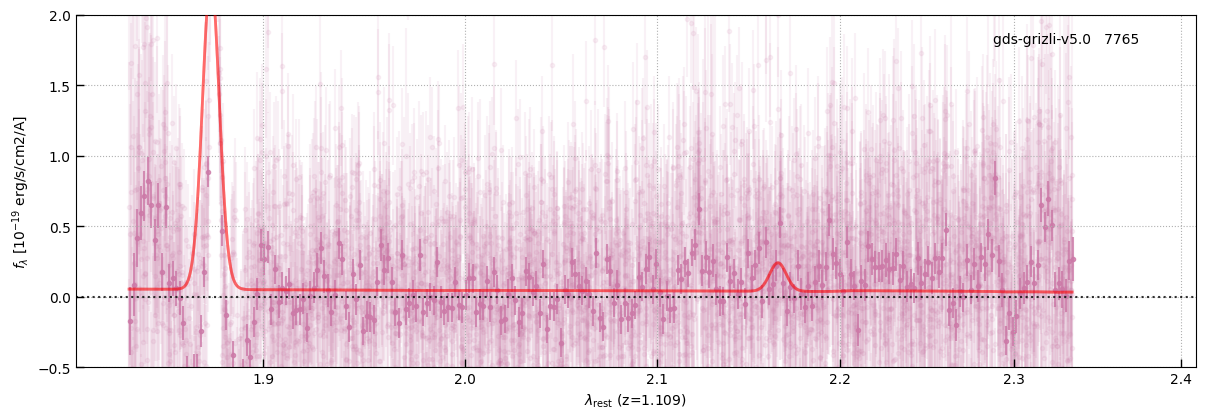

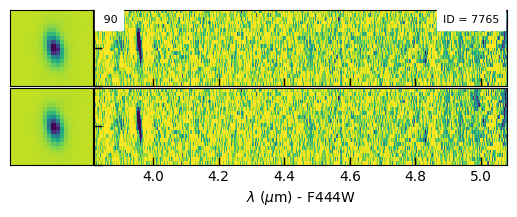

In [62]:
tfit = mb.template_at_z(z=z)

_ = mb.oned_figure(bin=2, tfit=tfit, show_rest=True, figsize=(12,4))
ax = _.axes[0]
ax.set_ylim(-0.5, 2)
_ = mb.drizzle_grisms_and_PAs(tfit=tfit,)

Run id=7765 with fit_args.npy
load_master_fits: gds-grizli-v5.0_07765.beams.fits
1 jw01895001003_04101_00002_nrcblong_rate.fits F444W
2 jw01895001003_02101_00003_nrcblong_rate.fits F444W
3 jw01895001003_04101_00001_nrcblong_rate.fits F444W
4 jw01895001003_04101_00004_nrcblong_rate.fits F444W
5 jw01895001003_02101_00004_nrcblong_rate.fits F444W
6 jw01895001003_02101_00001_nrcblong_rate.fits F444W
7 jw01895001003_02101_00002_nrcblong_rate.fits F444W
8 jw01895001003_04101_00003_nrcblong_rate.fits F444W
User templates! N=17 

  1.0985  151911.0 (1.0985) 1/11
  1.1006  151911.1 (1.0985) 2/11
  1.1027  151911.5 (1.0985) 3/11
  1.1048  151911.9 (1.0985) 4/11
  1.1069  151805.7 (1.1069) 5/11
  1.1090  150572.2 (1.1090) 6/11
  1.1111  149424.7 (1.1111) 7/11
  1.1132  151117.8 (1.1111) 8/11
  1.1153  151895.4 (1.1111) 9/11
  1.1174  151911.1 (1.1111) 10/11
  1.1195  151910.9 (1.1111) 11/11
First iteration: z_best=1.1111

- 1.1089  150673.4 (1.1089) 1/21
- 1.1091  150455.9 (1.1091) 2/21
- 1.1093 

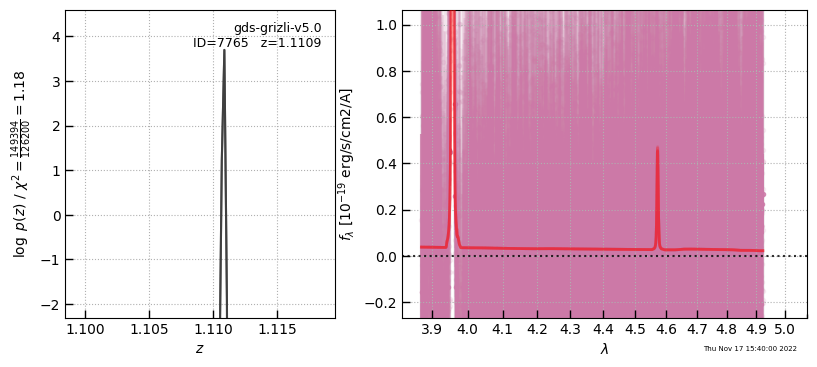

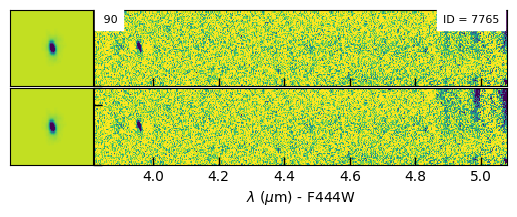

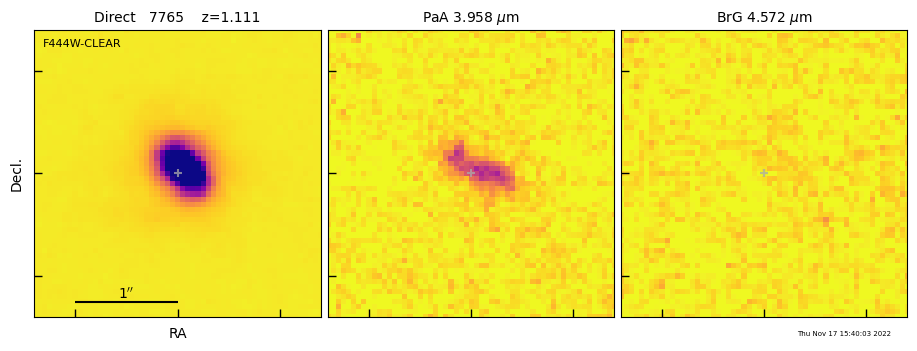

In [63]:
# Fit redshift around the guess
from grizli import fitting

_ = fitting.run_all_parallel(id, get_output_data=True,
                             zr=[z-0.005*(1+z), z+0.005*(1+z)], dz=[0.001, 0.0002], 
                             dscale=0.01, # scaling of direct cutout
                             verbose=True,
                             line_size=1.4)

# Find a source that corresponds to a line in the filtered combined image

In [64]:
# Preliminaries

# Calculate wavelengths that would define the trace

flt = grp.FLTs[0]
conf = flt.conf

tgrid = np.linspace(0,1,1024)
dx = conf.conf.DISPX('+1', 1024, 1024, tgrid)
dy = conf.conf.DISPY('+1', 1024, 1024, tgrid)
dtdx = np.diff(tgrid)/np.diff(np.sqrt(dx**2+dy**2))

print('dt/dx: ', np.median(dtdx))

tgrid = np.arange(0,1,np.median(dtdx)/2.)
dx = conf.conf.DISPX('+1', 1024, 1024, tgrid)
lams = conf.conf.DISPL('+1', 1024, 1024, tgrid)
dy = conf.conf.DISPY('+1', 1024, 1024, tgrid)

if 0:
    wlim = [3.9, 5.05]
    clip = (lams > wlim[0]) & (lams < wlim[1])
    lams = lams[clip]
    dx = dx[clip]
    dy = dy[clip]
    tgrid = tgrid[clip]

lmin, lmax = lams.min(), lams.max()
len(lams), len(tgrid)

dt/dx:  0.0007285558960518528


(2746, 2746)

In [54]:
# Coordinates in line image

#import grizli.ds9
#ds9 = grizli.ds9.DS9()
#rin, din = np.cast[float](ds9.get('pan fk5').split())

rin, din = 53.1033972, -27.7779116

rin, din = 53.1027997, -27.7857687


## Find source along trace

Given RA/Dec (`rin`, `din`) in the combined image of the filtered grism exposures:

1) Go through container exposures until one is found where that position is within the nominal exposure footprint
2) Find an inverse "trace" in RA/Dec. that would disperse onto the identified position
3) Match a table of the trace RA/Dec. to sources in the photometric catalog.
4) Each source along the trace will have a corresponding wavelength for the marked line

In [56]:
import astropy.io.fits as pyfits
import astropy.wcs as pywcs
from grizli import prep
utils.set_warnings()

for flt in grp.FLTs:
    with pyfits.open('../Prep/' + flt.grism.parent_file) as im:
        wcs_i = pywcs.WCS(im['SCI'].header, relax=True)
        wcs_i.pscale = utils.get_wcs_pscale(wcs_i)
    
        xw, yw = np.squeeze(wcs_i.all_world2pix([rin], [din], 0))
        print(flt.grism.parent_file, xw, yw)
        
        if (xw > 0) & (yw > 0) & (xw < 2048) & (yw < 2048):
            conf = flt.conf
            break
            
def source_xypos(xw, yw, conf, lam):
    
    x0 = xw*1
    y0 = yw*1

    for _iter in range(3):
        t0 = conf.INVDISPL('+1', x0, y0, lam)
        dx = conf.DISPX('+1', x0, y0, t0)
        dy = conf.DISPY('+1', x0, y0, t0)

        dr = np.sqrt((x0+dx-xw)**2+(y0+dy-yw)**2).sum()
        #print(dr)
        x0 = xw-dx
        y0 = yw-dy

    return x0, y0, dr

trace = []
for lam in lams:
    trace.append(source_xypos(xw, yw, conf.conf, lam))

trace = np.array(trace).T
xtr, ytr, dtr = trace

ra_tr, de_tr = wcs_i.all_pix2world(xtr, ytr, 0)
ra_u, de_u = wcs_i.all_pix2world(xtr, ytr+1, 0)
ra_l, de_l = wcs_i.all_pix2world(xtr, ytr-1, 0)

sr = utils.SRegion(np.array([np.append(ra_u, ra_l[::-1])[::10], np.append(de_u, de_l[::-1])[::10]]))

tab_tr = utils.GTable()
tab_tr['ra'] = ra_tr
tab_tr['dec'] = de_tr
tab_tr['wave'] = lams

idx, dr = tab_tr.match_to_catalog_sky(phot)
hasm = dr.value < 0.3
if hasm.sum() > 0:
    mlim = 25.7
    if np.nanmin(phot['mag_auto'][hasm]) < mlim:
        hasm &= phot['mag_auto'] < mlim

#hasm.sum()
tabm = tab_tr[idx][hasm]

for c in ['id','mag_auto']:
    tabm[c] = phot[c][hasm]

tabm['dr'] = dr[hasm]
tabm['dr'].format = '4.2f'
tabm['mag_auto'].format = '.2f'
tabm['wave'].format = '8.6f'

prep.table_to_regions(tabm, 'trace.reg', comment=[f'{i}' for i in tabm['id']], size=0.1)

with open('trace.reg','a') as fp:
    #fp.write('icrs\n')
    for r in sr.region:
        fp.write(r+'\n')

# ds9.set(f'regions file {os.getcwd()}/trace.reg')
so = np.argsort(tabm['dr'])
tabm = tabm[so]
print(tabm)

imin = 0
#imin = np.where(tabm['id'] == 4195)[0][0]

id = tabm['id'][imin]
wref = tabm['wave'][imin]

print(f'\nID={id}, trace_wave = {wref:.4f} um')

# ds9.set(f"pan to {tabm['ra'][imin]} {tabm['dec'][imin]} fk5")


jw01895001003_04101_00002_nrcblong_rate.fits 1766.448614358207 948.0587122687944
trace.reg: x = ra, y=dec, ellipse=False
        ra                 dec           wave    id  mag_auto   dr  
       deg                 deg                         uJy    arcsec
------------------ ------------------- -------- ---- -------- ------
 53.10061894882803 -27.785574226363078 4.072682 4959    24.49   0.04
53.098076694218456 -27.785543729837784 4.197899 5005    23.29   0.14
53.087761349346145  -27.78538620446337 4.701221 5172    21.60   0.20

ID=4959, trace_wave = 4.0727 um


1

In [57]:
# Assume it's PaA
z = wref / 1.8756 - 1

print(f'\nID={id}, trace_wave = {wref:.4f} um, z = {z:.4f}')


ID=4959, trace_wave = 4.0727 um, z = 1.1714


In [58]:
beams = grp.get_beams(id, size=64, min_mask=args['min_mask'], min_sens=args['min_sens'], mask_resid=False)
mb = multifit.MultiBeam(beams, **args)
mb.write_master_fits()

gds-grizli-v5.0_04959.beams.fits


Run id=4959 with fit_args.npy
load_master_fits: gds-grizli-v5.0_04959.beams.fits
1 jw01895001003_04101_00002_nrcblong_rate.fits F444W
2 jw01895001003_02101_00003_nrcblong_rate.fits F444W
3 jw01895001003_04101_00001_nrcblong_rate.fits F444W
4 jw01895001003_04101_00004_nrcblong_rate.fits F444W
5 jw01895001003_02101_00004_nrcblong_rate.fits F444W
6 jw01895001003_02101_00001_nrcblong_rate.fits F444W
7 jw01895001003_02101_00002_nrcblong_rate.fits F444W
8 jw01895001003_04101_00003_nrcblong_rate.fits F444W
User templates! N=17 

  1.1605  126362.9 (1.1605) 1/11
  1.1627  126363.1 (1.1605) 2/11
  1.1649  126362.3 (1.1649) 3/11
  1.1670  126363.5 (1.1649) 4/11
  1.1692  126349.8 (1.1692) 5/11
  1.1714  125753.2 (1.1714) 6/11
  1.1735  126249.2 (1.1714) 7/11
  1.1757  126357.0 (1.1714) 8/11
  1.1779  126362.8 (1.1714) 9/11
  1.1801  126362.6 (1.1714) 10/11
  1.1823  126362.3 (1.1714) 11/11
First iteration: z_best=1.1714

- 1.1695  126325.7 (1.1695) 1/21
- 1.1697  126309.8 (1.1697) 2/21
- 1.1699 

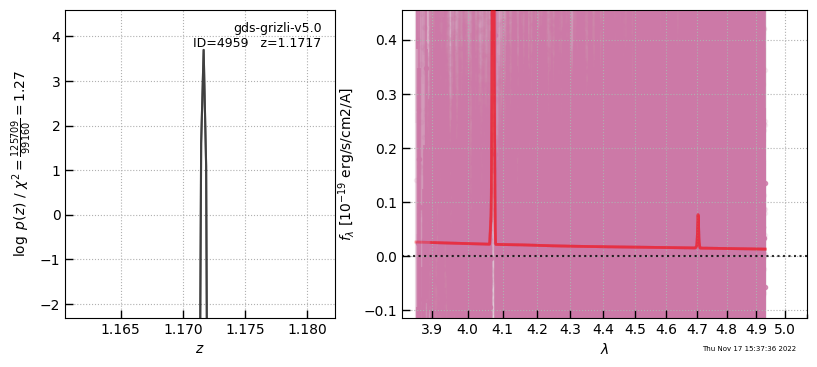

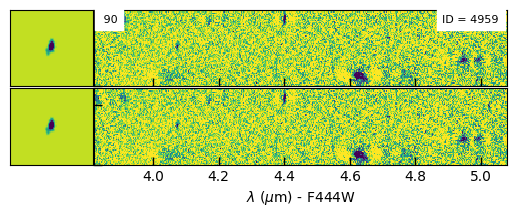

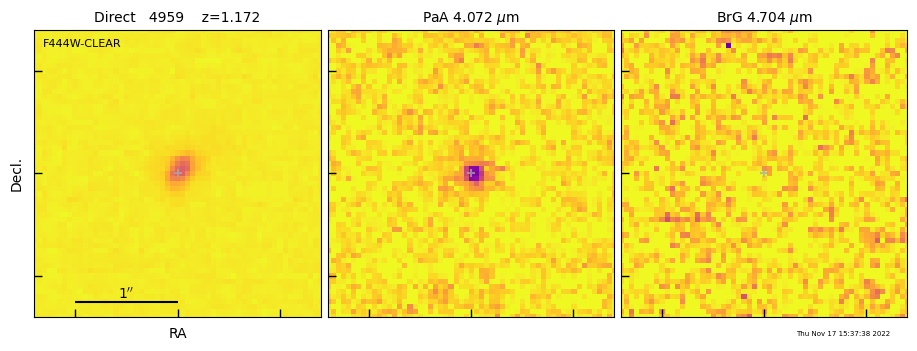

In [59]:
# Fit redshift around the guess
from grizli import fitting

_ = fitting.run_all_parallel(id, get_output_data=True,
                             zr=[z-0.005*(1+z), z+0.005*(1+z)], dz=[0.001, 0.0002], 
                             dscale=0.01, # scaling of direct cutout
                             verbose=True,
                             line_size=1.4)